In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

0.8333333333333333

In [ ]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

Downloading...
From: https://drive.google.com/uc?id=1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K
To: /content/train.csv
100% 664k/664k [00:00<00:00, 38.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r
To: /content/test.csv
100% 218k/218k [00:00<00:00, 29.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y
To: /content/submission.csv
100% 14.7k/14.7k [00:00<00:00, 2.00MB/s]


In [ ]:
data = pd.read_csv('./train.csv')

In [ ]:
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [ ]:
print(data.shape)
data.sample(5)

(5282, 20)


,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1305,38,95.00,3591.25,Female,1,Yes,No,Yes,Yes,Fiber optic,Yes,Yes,No,No,No,Yes,One year,No,Credit card (automatic),0
682,6,83.55,477.55,Male,0,Yes,Yes,Yes,No,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),1
2196,1,80.20,80.2,Female,0,No,No,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,1
4593,54,82.45,4350.1,Female,1,No,No,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,Yes,One year,No,Bank transfer (automatic),1
29,25,89.70,2187.55,Female,1,No,No,Yes,Yes,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Electronic check,1


In [ ]:
test = pd.read_csv('./test.csv')

In [ ]:
test.replace('?', np.nan, inplace=True)
data.replace('?', np.nan, inplace=True)


In [ ]:
data.duplicated(keep=False).sum()

28

In [ ]:
data[data.duplicated(keep=False)]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
7,1,45.70,45.7,Male,0,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,1
170,1,69.90,69.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1
329,1,69.35,69.35,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1
409,1,69.60,69.6,Female,1,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1
594,1,20.05,20.05,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
838,1,19.65,19.65,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
1068,1,70.15,70.15,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,1
1217,1,20.20,20.2,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,1
1236,1,45.30,45.3,Male,0,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,1
1384,1,69.90,69.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1


In [ ]:
data[data.drop('Churn', axis=1).duplicated(keep=False)].shape

(41, 20)

In [ ]:
data = data.drop_duplicates(keep=False)

In [ ]:
data.shape

(5254, 20)

In [ ]:
data.replace(' ', np.nan, inplace=True)
test.replace(' ', np.nan, inplace=True)


In [ ]:
data.isna().mean()

ClientPeriod                0.000000
MonthlySpending             0.000000
TotalSpent                  0.001713
Sex                         0.000000
IsSeniorCitizen             0.000000
HasPartner                  0.000000
HasChild                    0.000000
HasPhoneService             0.000000
HasMultiplePhoneNumbers     0.000000
HasInternetService          0.000000
HasOnlineSecurityService    0.000000
HasOnlineBackup             0.000000
HasDeviceProtection         0.000000
HasTechSupportAccess        0.000000
HasOnlineTV                 0.000000
HasMovieSubscription        0.000000
HasContractPhone            0.000000
IsBillingPaperless          0.000000
PaymentMethod               0.000000
Churn                       0.000000
dtype: float64

In [ ]:
test.isna().mean()

ClientPeriod                0.000000
MonthlySpending             0.000000
TotalSpent                  0.001136
Sex                         0.000000
IsSeniorCitizen             0.000000
HasPartner                  0.000000
HasChild                    0.000000
HasPhoneService             0.000000
HasMultiplePhoneNumbers     0.000000
HasInternetService          0.000000
HasOnlineSecurityService    0.000000
HasOnlineBackup             0.000000
HasDeviceProtection         0.000000
HasTechSupportAccess        0.000000
HasOnlineTV                 0.000000
HasMovieSubscription        0.000000
HasContractPhone            0.000000
IsBillingPaperless          0.000000
PaymentMethod               0.000000
dtype: float64

In [ ]:
data['TotalSpent'] = data['TotalSpent'].fillna(0).astype(float)
test['TotalSpent'] = test['TotalSpent'].fillna(0).astype(float)

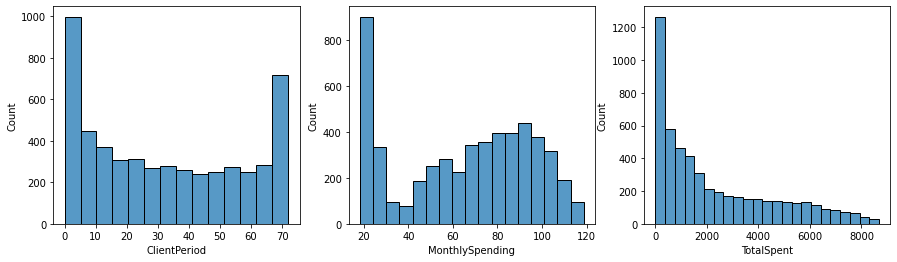

In [ ]:
fig, axes = plt.subplots(figsize=[15, 4], nrows=1, ncols=3)
for index, axis in enumerate(axes):
  sns.histplot(data=data[num_cols[index]], ax=axis)

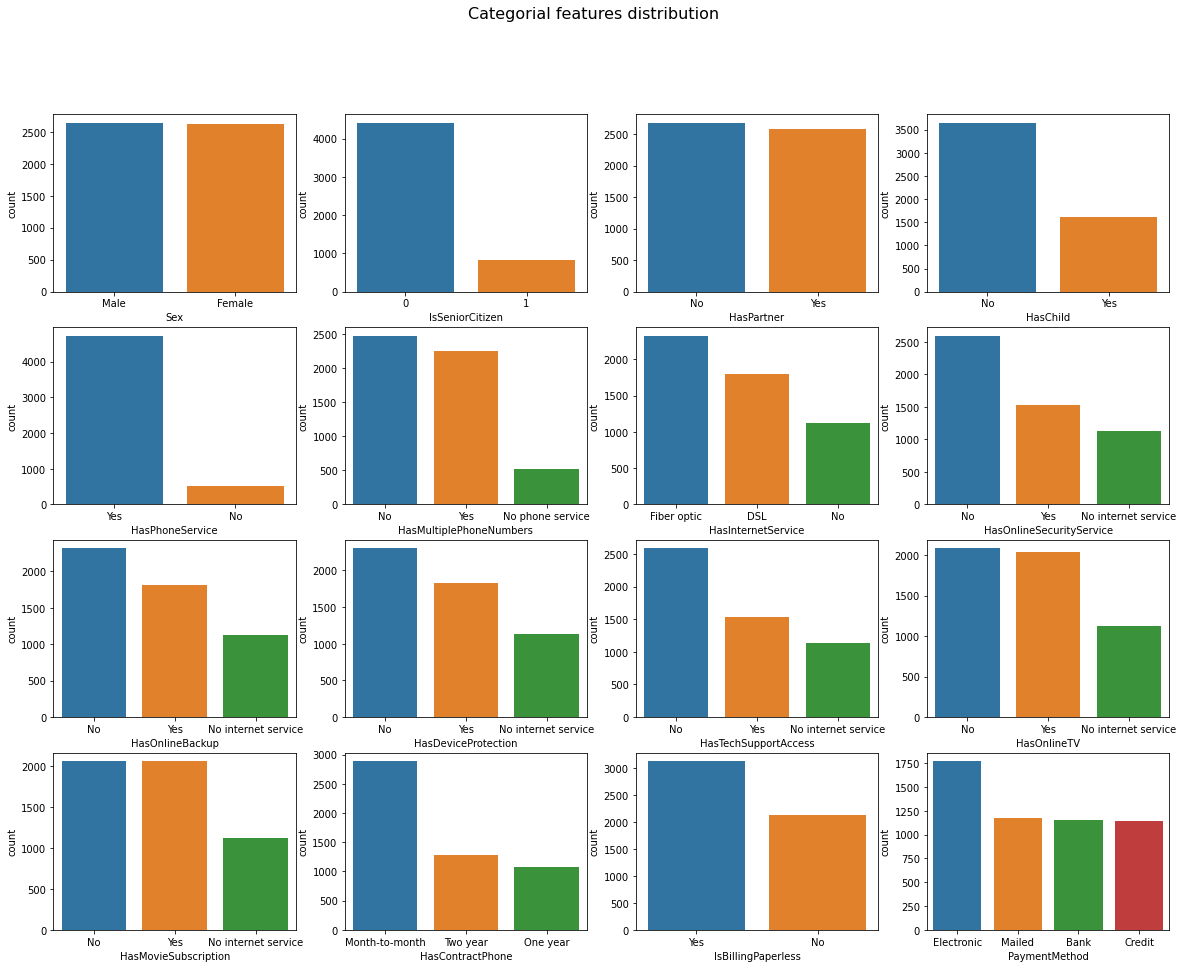

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 15))
fig.suptitle("Categorial features distribution", fontsize=(16))
for row_ind, axis_row in enumerate(axes):
    for ax_ind, axis in enumerate(axis_row):
        index = ax_ind + 4 * row_ind
        counts = data[cat_cols[index]].value_counts()
        names = [name.split()[0] if index == 15 else name for name in counts.index]
        barplot = sns.barplot(x=names, y=counts.values, ax=axis)
        barplot.set_xlabel(cat_cols[index])
        barplot.set_ylabel('count')


Распределение таргета примерно 3 к 1, поэтому датасет можно считать сбалансированым

0    3890
1    1364
Name: Churn, dtype: int64

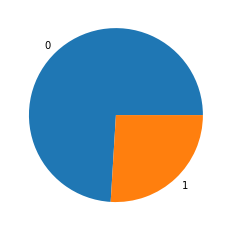

In [ ]:
plt.pie(data[target_col].value_counts(), labels=[0, 1])
data[target_col].value_counts()


In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier


In [ ]:
target_train = data[target_col]


data_train = pd.concat((data[num_cols], pd.get_dummies(data[cat_cols])), axis=1)
data_test = pd.concat((test[num_cols], pd.get_dummies(test[cat_cols])), axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(data_train, target_train, test_size=0.2)

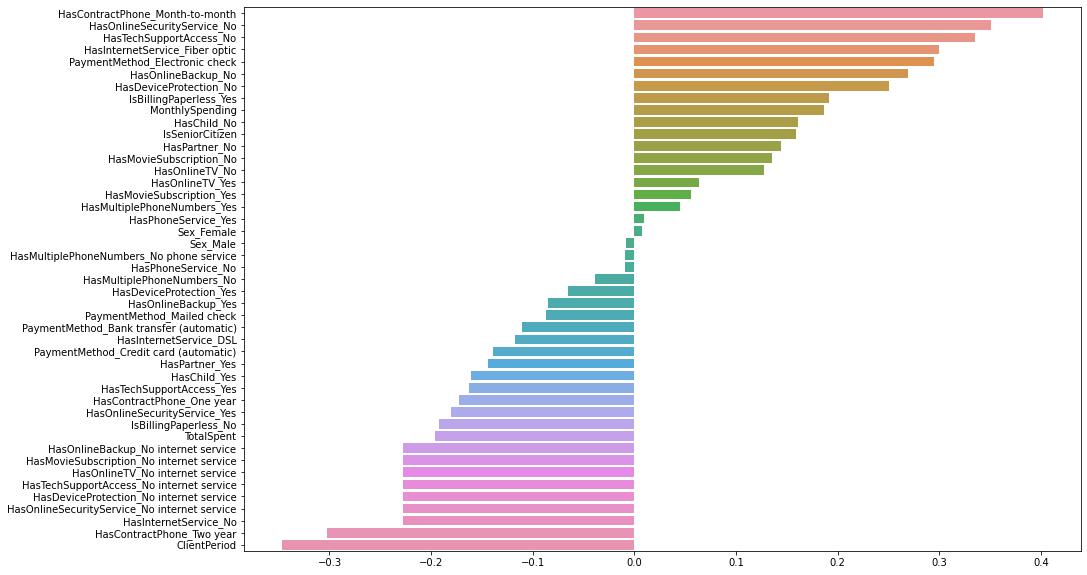

In [ ]:
corr = data_train.corrwith(target_train).sort_values(ascending=False)

plot = sns.barplot(y=corr.index, x=corr)
plot.figure.set_size_inches(15, 10)

In [ ]:
scaler = MinMaxScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])
data_test[num_cols] = scaler.transform(data_test[num_cols])


In [ ]:
def draw_result(model):
  y_train_predicted = model.predict_proba(X_train)[:, 1]
  y_test_predicted = model.predict_proba(X_test)[:, 1]

  train_auc = roc_auc_score(Y_train, y_train_predicted)
  test_auc = roc_auc_score(Y_test, y_test_predicted)

  plt.figure(figsize=(20,10))
  plt.plot(*roc_curve(Y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
  plt.plot(*roc_curve(Y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
  legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
  legend_box.set_facecolor("white")
  legend_box.set_edgecolor("black")
  plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
  plt.show()


In [ ]:
# parameters = {
#     'penalty': ["l1", "l2"],
#     'solver': ["saga", "libnear"],
#     'C': [0.001, 0.01, 0.1, 0.2, 0.3],
#     'max_iter': [1000],
#     'n_jobs': [-1]

# }
# # не выбран elasticnet поскольку solver будет единственным

# clf = LogisticRegression(random_state=42)
# grid_search_clf = GridSearchCV(clf, param_grid=parameters, cv=5,scoring='roc_auc')
# grid_search_clf.fit(X_train, Y_train)

clf_best = LogisticRegression(C=0.1, max_iter= 1000, n_jobs=-1,penalty='l1', random_state=42, solver='saga')
clf_best.fit(X_train, Y_train)


LogisticRegression(C=0.1, max_iter=1000, n_jobs=-1, penalty='l1',
                   random_state=42, solver='saga')

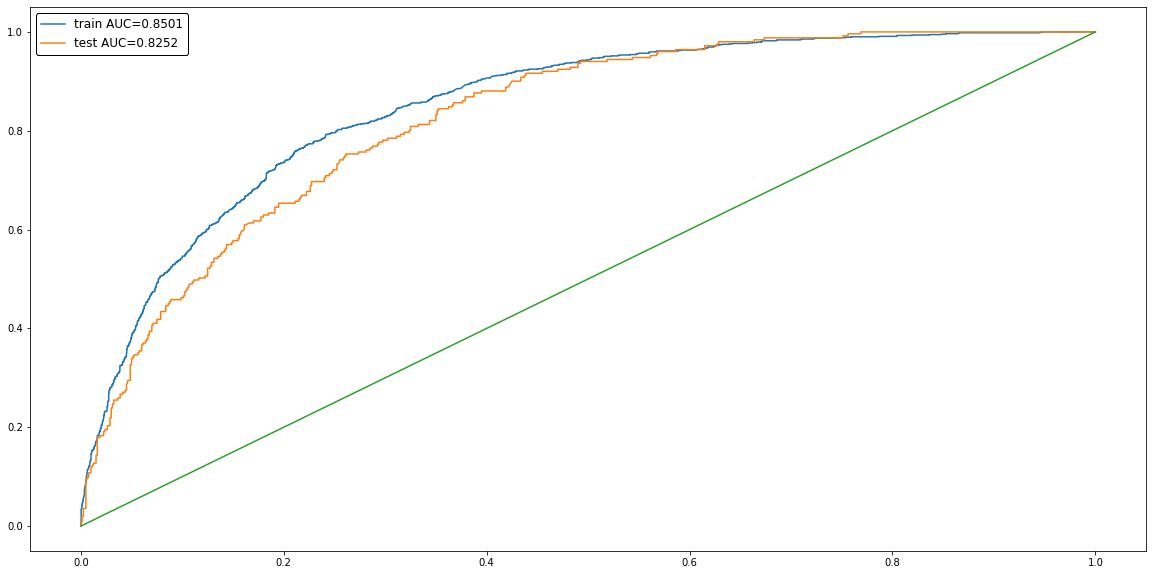

In [ ]:
draw_result(clf_best)

RandomForest

In [ ]:
# parameters = {
#     'criterion' : ['gini', 'entropy', 'log_loss'],
#     'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
#     'n_jobs': [-1],
#     'min_samples_split' : range(1, 25, 4),
#     'n_estimators' : [100, 150, 200, 250, 300]
# }

# rfc = RandomForestClassifier(random_state=42)
# grid_search_rfc = GridSearchCV(rfc, param_grid=parameters, cv=5,scoring='roc_auc')
# grid_search_rfc.fit(X_train, Y_train)

rfc_best = RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_split=21,
                       n_jobs=-1, random_state=42, n_estimators=222)
rfc_best.fit(X_train, Y_train)



RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_split=21,
                       n_estimators=222, n_jobs=-1, random_state=42)

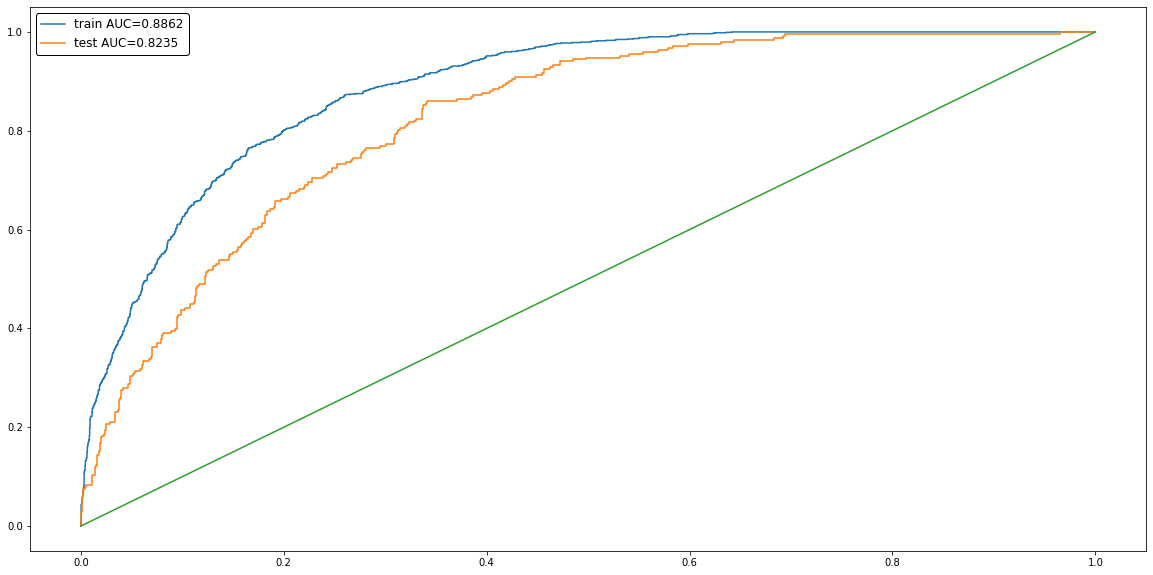

In [ ]:
draw_result(rfc_best)

Knn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

parameters = {
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'weights' : ['uniform', 'distance'],
    'n_jobs' : [-1],
    'p' : [0, 1, 2],
    'n_neighbors' : range(2, 50, 1)
}

knn_clf =  KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn_clf, param_grid=parameters, cv=5,scoring='roc_auc')
grid_search_knn.fit(X_train, Y_train)

knn_best = grid_search_knn.best_estimator_
knn_best.fit(X_train, Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1920 fits failed out of a total of 5760.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1920 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py", line 213, in fit
    self._validate_params()
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.9/dist-packages/skl

KNeighborsClassifier(algorithm='ball_tree', n_jobs=-1, n_neighbors=49, p=1)

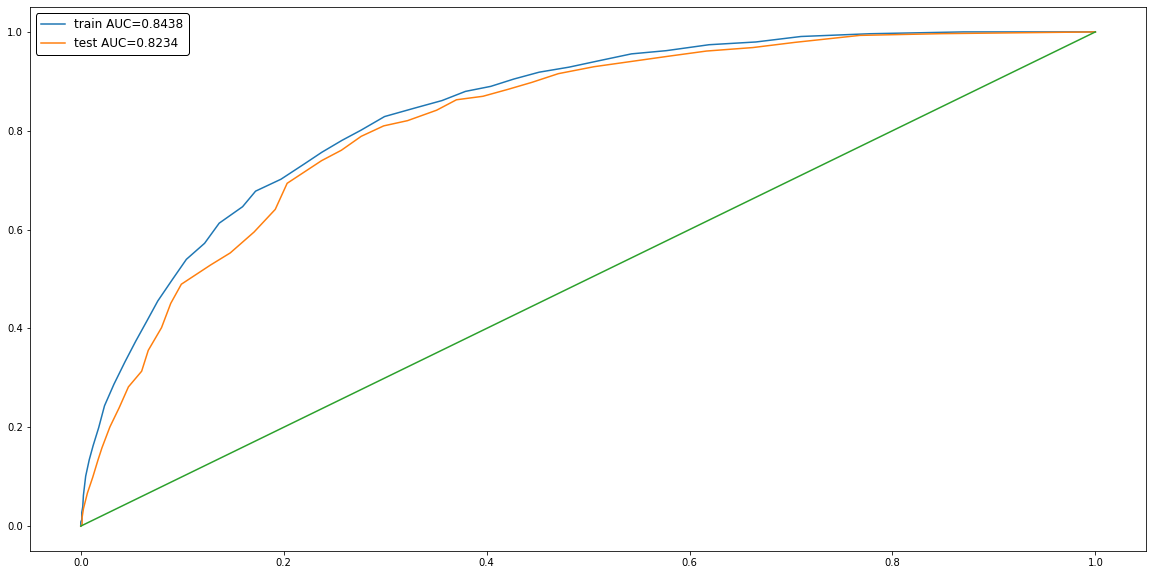

In [ ]:
draw_result(knn_best)

In [ ]:
from catboost import CatBoostClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 8.7 MB/s eta 0:00:00


In [ ]:
def draw_result_ctbst(model):
  y_train_predicted = model.predict_proba(X_train_catboost)[:, 1]
  y_test_predicted = model.predict_proba(X_test_catboost)[:, 1]

  train_auc = roc_auc_score(Y_train_catboost, y_train_predicted)
  test_auc = roc_auc_score(Y_test_catboost, y_test_predicted)

  plt.figure(figsize=(20,10))
  plt.plot(*roc_curve(Y_train_catboost, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
  plt.plot(*roc_curve(Y_test_catboost, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
  legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
  legend_box.set_facecolor("white")
  legend_box.set_edgecolor("black")
  plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
  plt.show()


In [ ]:
clf_cbst = CatBoostClassifier( depth=5,
    iterations=200,
    eval_metric='AUC',
    l2_leaf_reg=4.26,
    learning_rate=0.0501,
    loss_function='Logloss',
    cat_features=cat_cols,
    random_seed=42,
    verbose=200)
X_train_catboost, X_test_catboost, Y_train_catboost, Y_test_catboost = train_test_split(data[num_cols + cat_cols], data[target_col], test_size=0.2)

clf_cbst.fit(X_train_catboost, Y_train_catboost)
# parameters = {
    
#     'depth': np.arange(1, 10, 1),
#     'iterations' : np.arange(100, 2000, 100),
#     'eval_metric' : 'AUC',
#     'l2_leaf_reg' : np.arange(0.1, 5, 0.25),
#     'learning_rate' : np.arange(0.001, 3, 0.05),
#     'loss_function': 'Logloss',
#     'cat_features' : 'cat_cols',
#     'random_seed' : 42,
#     'verbose' : 200
# }

# clf_cbst.grid_search(parameters, X_train_catboost, Y_train_catboost, cv=5, plot=True, refit=True)


0:	total: 76.4ms	remaining: 15.2s
199:	total: 6s	remaining: 0us


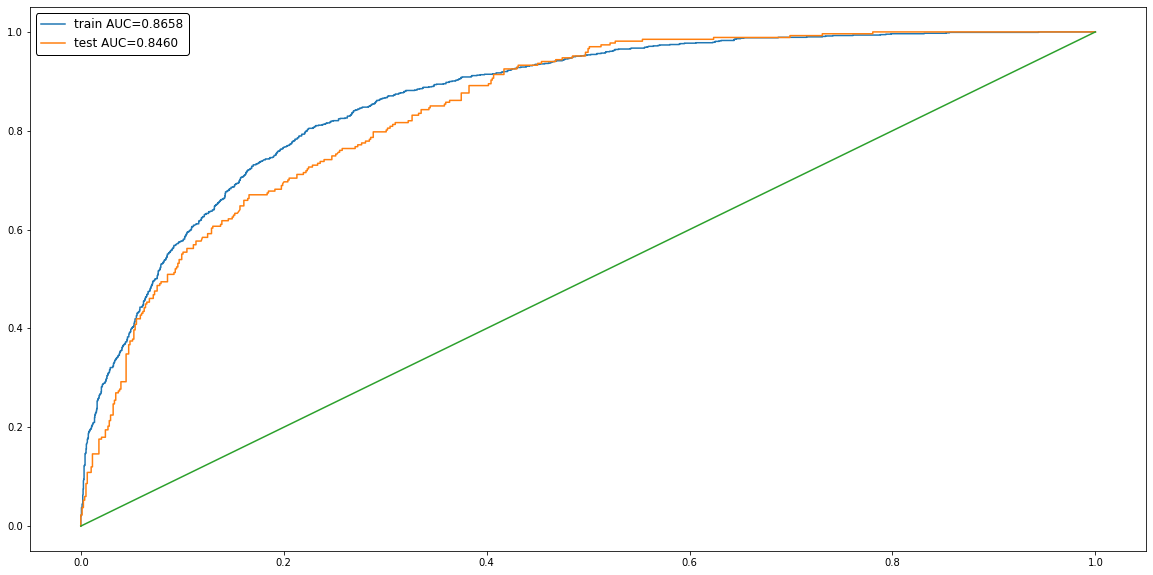

In [ ]:
draw_result_ctbst(clf_cbst)

In [ ]:
best_model = rfc_best

In [ ]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(data_test)[:, 1]
submission.to_csv('my_submission.csv', index=False)